# CALTECH CONTROL PACKAGE

This notebook introduces core elements of the CalTech control package and provides various examples of using the with Tellurium.

# Preliminaries

In [1]:
try:
    import controlSBML as ctl
except:
    !pip install -q controlSBML
    import controlSBML as ctl

import control
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tellurium as te

## Antimony Models

### Linear Model

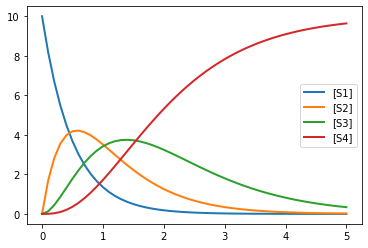

In [2]:
LINEAR_MDL = """
S1 -> S2; k1*S1
S2 -> S3; k2*S2
S3 -> S4; k3*S3

k1 = 2
k2 = 1.5
k3 = 1
S1 = 10
S2 = 0
S3 = 0
S4 = 0
"""
LINEAR_RR = te.loada(LINEAR_MDL)
LINEAR_DATA = LINEAR_RR.simulate()
LINEAR_RR.plot(LINEAR_DATA)
LINEAR_STATE_NAMES = ["S1", "S2", "S3", "S4"]
LINEAR_PARAM_DCT = {"input_names": LINEAR_STATE_NAMES, "output_names": LINEAR_STATE_NAMES}

**System Equations**

$
\begin{eqnarray}
\dot{S}_1 & =&  -& k_1 S_1 & +&  0 S_2 &+& 0 S_3 \\
\dot{S}_2 &=& + & k_1 S_1  &-& k_2 S_2 &+& 0S_3 \\
\dot{S}_3 &=& +& 0S_1 &+& k_2 S_2 &-& k_3 S_3 \\
\dot{S}_4 &=& +& 0S_1 &+& 0 S_2 &+& k_3 S_3
\end{eqnarray}
$

### Nonlinear Model

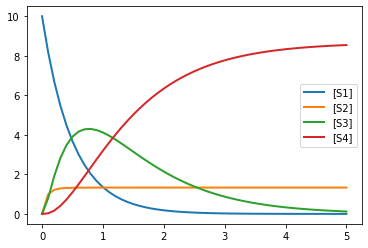

In [3]:
NONLINEAR_MDL = """
S1 -> S2; k1*S1
S2 -> S3; k2*S2*S1
S3 -> S4; k3*S3

k1 = 2
k2 = 1.5
k3 = 1
S1 = 10
S2 = 0
S3 = 0
S4 = 0
"""
NONLINEAR_RR = te.loada(NONLINEAR_MDL)
NONLINEAR_DATA = NONLINEAR_RR.simulate()
NONLINEAR_RR.plot(NONLINEAR_DATA)

# Helpers

In [4]:
def plotSys(sys, param_dct, is_plot=True):
    """
    Constructs a plot for a system.
    
    Parameters
    ----------
    sys: control.NonlinearIOSystem
    param_dct: dict
        key: "input_names", value: list-str
        key: "output_names", value: list-str
    """
    # Simulate the system
    X0 = [10, 0, 0, 0]               # Initial conditions for species concentrations
    T = np.linspace(0, 5, 101)   # Simulation 70 years of time

    # Simulate the system
    t, y = control.input_output_response(sys, T, 0, X0, params=param_dct)

    output_names = param_dct["output_names"]
    # Plot the response
    plt.figure(1)
    for idx in range(len(output_names)):
        plt.plot(t, y[idx])
    plt.legend(output_names)
    if not is_plot:
        plt.close()
    else:
        plt.show(block=False)
    
# Tests
ctlsb = ctl.ControlSBML(LINEAR_MDL)
sys = ctlsb.makeNonlinearIOSystem("linear_mdl")
plotSys(sys, LINEAR_PARAM_DCT, is_plot=False)
print("OK!")

OK!


# Transfer Functions

In [5]:
tf1 = control.TransferFunction([1], [1, 0])
tf2 = control.TransferFunction([1], [1, 1])

# Combining Transfer Functions

* Series
* Parallel
* Feedback

In [6]:
tf = control.series(tf1, tf2)

# Simulation of Transfer Functions

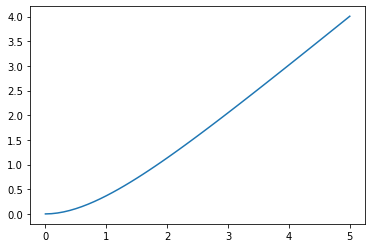

In [7]:
times = [0.1*v for v in range(51)]
result = control.forced_response(tf, times, 1, 0)
plt.plot(result.t, result.outputs)

In [8]:
tf3 = control.TransferFunction([1], [1, 2])
tff = control.Series(tf1, tf3)
result = control.forced_response(tff, times, 1, 0)
plt.plot(result.t, result.outputs)

AttributeError: module 'control' has no attribute 'Series'